# Autoencoders 1: Dimensionality Reduction using Autoencoders

Autoencoders (AE) are neural networks that are trained to attemp to copy its input into the output. This kind of network is mainly composed of three parts:

 <b>1. Encoder: </b> Compresses the original input to a latent representation. Mathematically:  $h = f(x)$ <br>
 <b>2. Decoder: </b> Reconstructs the input from the latent space representation. Mathematically:  $\tilde{x} = g(h) = g(f(x))$ <br>
 <b>3. Bottleneck: </b> Layer that converts the latent representation of the network to its lowest possible dimensionality.
 
An example of an Autoencoder is displayed in the following image <br>

<img src="img/autoencoder_structure.png" alt="Drawing" style="width: 40%;"/>

Im might sound dumb to have a neural network to copy the input, but the key here resides on the latent representation $h$, which is actually the part that interests us the most as it has some nice properties. This latent space representation usually corresponds to a low-dimensional representation of the input, whcih condenses its most relevant and characterisitc features. An autoencoder in which the dimensionality of the latent space is smaller than the one of the input is called <b>undercomplete</b>.

In this notebook we investigate how dimensionality reduction can be computed using autoencoders.

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
    This notebook illustrates the tutorial blog post: <b><a href="http://www.angelvillarcorrales.com/templates/tutorials/autoencoders/DimensionalityReductionAutoencoders.php">Dimensionality Reduction using Autoencoders</a></b><br>
     Therefore, theoretical contents might not completely be explained in detail. Please refer to the post for more in-depth explanations.  
</div> 

In [1]:
from matplotlib import pyplot as plt

In [2]:
import lib.models as models
import lib.visualizations as visualizations
import lib.data_handler as data_handler
import lib.utils as utils

Using TensorFlow backend.


In [3]:
import keras.backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# loading MNIST dataset
train_set, test_set = data_handler.load_mnist_dataset()

## Shallow Fully Connected Autoencoder

The first architecture that we try is a simply autoencoder in which 2 layers are used for encoding and for decoding 

In [6]:
shallow_autoencoder, _ = models.shallow_fully_connected_autoencoder(bottleneck_dim=10, loss="mse")
shallow_autoencoder.summary()

Model: "shallow_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
bottleneck (Dense)           (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               79184     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)    

In [7]:
# training our autoencoder
training_log = shallow_autoencoder.fit(train_set[0], train_set[0],
                                       epochs=20, batch_size=1024,
                                       shuffle=True, validation_data=(test_set[0],test_set[0]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1044 - val_loss: 0.0677
Epoch 2/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0601 - val_loss: 0.0533
Epoch 3/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0500 - val_loss: 0.0463
Epoch 4/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0437 - val_loss: 0.0403
Epoch 5/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0388 - val_loss: 0.0367
Epoch 6/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0357 - val_loss: 0.0340
Epoch 7/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.0335 - val_loss: 0.0322
Epoch 8/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0320 - val_loss: 0.0308
Epoch 9/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0305 - val_loss: 0.0293
Epoch 10/2

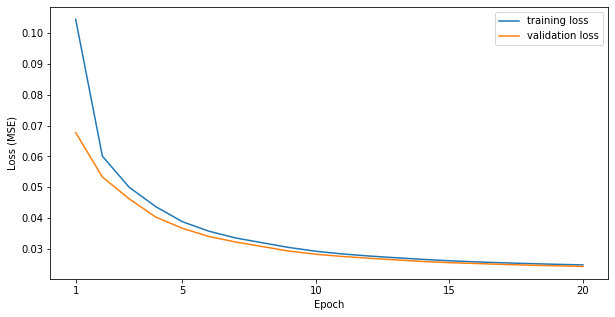

In [8]:
training_loss = training_log.history["loss"]
validation_loss = training_log.history["val_loss"]

plt.figure(figsize=(10,5))
plt.plot(training_loss, label="training loss")
plt.plot(validation_loss, label="validation loss")
plt.legend(loc="best")
plt.ylabel("Loss (MSE)")
plt.xlabel("Epoch")
plt.xticks([0,4,9,14,19],[1,5,10,15,20])
plt.show()

In [9]:
# encoding and decoding the MNIST test set
decoded_imgs = shallow_autoencoder.predict(test_set[0])

In [1]:
# displaying some of the images before encodeing and after decoding
visualizations.display_original_and_decoded_imgs(img_original=test_set[0], img_decoded=decoded_imgs, n_images=5)

NameError: name 'visualizations' is not defined

## Effect of the dimensionality of the latent space

From the previous image, we can see that the numbers reconstructed from a 10-dimensional code look alike the original images, but blurry. This effect is increased as the dimensionality of the bottleneck (latent-space representation) becomes smaller.

In [11]:
shallow_autoencoder_dim_32, _ = models.shallow_fully_connected_autoencoder(bottleneck_dim=32, loss="mse")
# training our autoencoder
training_log = shallow_autoencoder_dim_32.fit(train_set[0], train_set[0],
                                              epochs=20, batch_size=1024,
                                              shuffle=True, validation_data=(test_set[0],test_set[0]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.1073 - val_loss: 0.0672
Epoch 2/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0579 - val_loss: 0.0480
Epoch 3/20
60000/60000 [==============================] - 1s 8us/step - loss: 0.0431 - val_loss: 0.0377
Epoch 4/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0350 - val_loss: 0.0315
Epoch 5/20
60000/60000 [==============================] - 1s 8us/step - loss: 0.0300 - val_loss: 0.0274
Epoch 6/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.0263 - val_loss: 0.0244
Epoch 7/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.0238 - val_loss: 0.0222
Epoch 8/20
60000/60000 [==============================] - 1s 8us/step - loss: 0.0220 - val_loss: 0.0206
Epoch 9/20
60000/60000 [==============================] - 0s 8us/step - loss: 0.0206 - val_loss: 0.0195
Epoch 10/20

In [12]:
shallow_autoencoder_dim_2, shallow_encoder_dim_2 = models.shallow_fully_connected_autoencoder(bottleneck_dim=2, loss="mse")
# training our autoencoder
training_log = shallow_autoencoder_dim_2.fit(train_set[0], train_set[0],
                                              epochs=20, batch_size=1024,
                                              shuffle=True, validation_data=(test_set[0],test_set[0]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.1184 - val_loss: 0.0715
Epoch 2/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0680 - val_loss: 0.0645
Epoch 3/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0633 - val_loss: 0.0620
Epoch 4/20
60000/60000 [==============================] - 0s 8us/step - loss: 0.0612 - val_loss: 0.0602
Epoch 5/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0597 - val_loss: 0.0589
Epoch 6/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0585 - val_loss: 0.0578
Epoch 7/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0575 - val_loss: 0.0569
Epoch 8/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0565 - val_loss: 0.0559
Epoch 9/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0557 - val_loss: 0.0552
Epoch 10/20
6

In [13]:
decoded_imgs_dim_32 = shallow_autoencoder_dim_32.predict(test_set[0])
decoded_imgs_dim_2 = shallow_autoencoder_dim_2.predict(test_set[0])

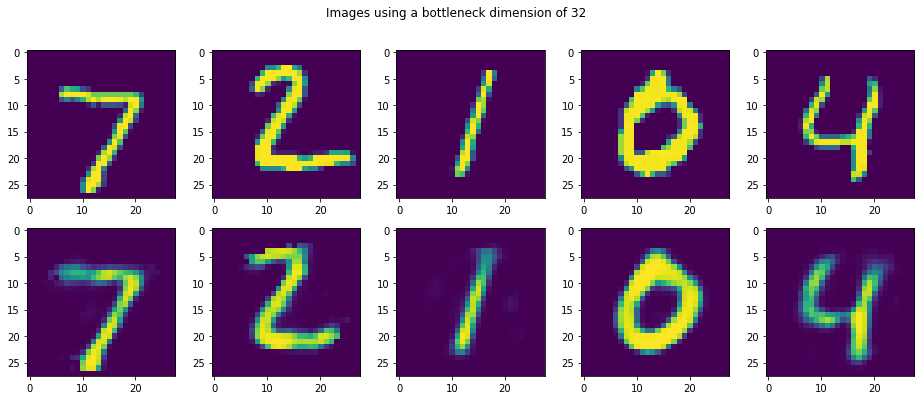

In [14]:
visualizations.display_original_and_decoded_imgs(img_original=test_set[0], img_decoded=decoded_imgs_dim_32, n_images=5,
                                                 idx=[0,1,2,3,4], title="Images using a bottleneck dimension of 32")

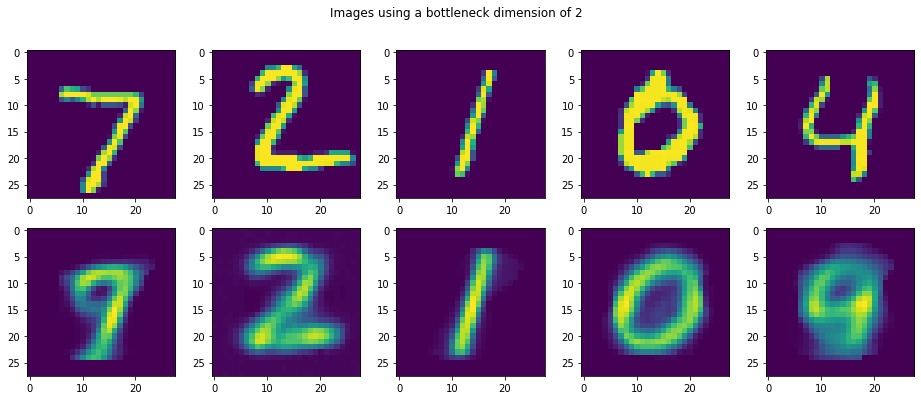

In [15]:
visualizations.display_original_and_decoded_imgs(img_original=test_set[0], img_decoded=decoded_imgs_dim_2, n_images=5,
                                                 idx=[0,1,2,3,4], title="Images using a bottleneck dimension of 2")

From these last two plots, we can see how the reconstructions using a code of dimensionality 32 are nearly perfect. This hints us that most of the information from these $28 \times 28$ images actually resides in much lower-dimensional manifold. Nevertheless, when using a just 2-dimensional code, mos of the information is lost, hence the decoded images being quite different, even wrong.

We can see how the decoder has troubles trying to distinguish between the digits 4, 7 and 9.

## Inspecting the latent space

As mentioned before, when performing dimensionality reduction with Autoencoders, we are not interested in the output of the network but on the low-dimensional latent space representation. 

What autoencoder do can be seen as some sort of PCA projection onto a low-dimensional manifold, but the main difference resides in the fact that, whereas PCA works just with linear manifolds, autoencoders can find projections onto non-linear manifolds due to the used non-linear activations, e.g., ReLU or Sigmoid.

In [16]:
autoencoder_projections = shallow_encoder_dim_2.predict(test_set[0])

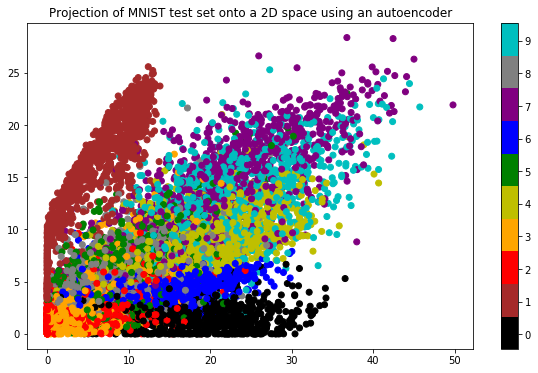

In [17]:
visualizations.plot_latent(autoencoder_projections, label=test_set[1], dim=2, title="Projection of MNIST test set onto a 2D space using an autoencoder")

In [18]:
pca_projections = utils.computed_PCA_projection(train_data=train_set[0], test_data=test_set[0], dim=2)

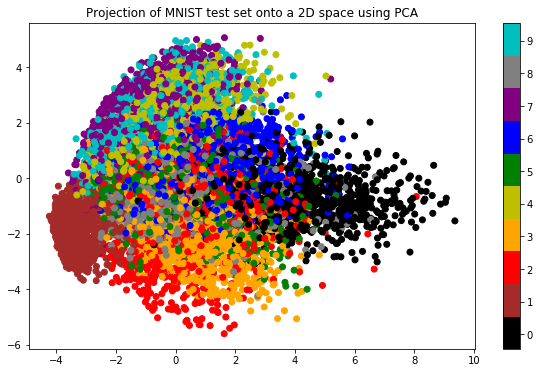

In [19]:
visualizations.plot_latent(pca_projections, label=test_set[1], dim=2, title="Projection of MNIST test set onto a 2D space using PCA")

The results displayed in these last two graphs are quite illustrative.

On the one hand, we can see how autoencoders find a representation where most of the digits are still (up to some point) separable. Nevertheless, we can still see how points corresponding to the projection of digits with labels $4$, $7$ and $9$ have a huge overlap. This is due to the fact that 2 numbers (code of dimension 2) are not enough to code the full complexity of the MNIST digits. However, other digits such as $0$ and $1$ (displayed in brown and black) are very nicely separated.  

On the other hand, PCA projected points are not as nicely represented as the ones projected using autoencoders. Despite the fact that we can still see some structure in the data, the classes cannot be so well separated as in the previous case. Nevertheless, points with class $0$ and $1$ are still beautifully clustered, which hints that these are the two easiest (most distinc) classes in this dataset.

Nevertheless, we can still do better!. In <b><a href="http://www.angelvillarcorrales.com">Convolutional Autoencoders</a></b> we see how these projections can still be improved.<br>

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
    This notebook was created by <b>Angel Villar-Corrales</b>
</div> 